<a href="https://colab.research.google.com/github/solomonmawira-dotcom/Flowers-Classification-CNN.ipynb/blob/main/Flowers_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # upload the new kaggle.json file



Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"erickotienoonyango","key":"1ba1624f9947da404bbaf358aad341ff"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip -q flowers-recognition.zip -d flowers_dataset


Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
100% 224M/225M [00:00<00:00, 527MB/s] 
100% 225M/225M [00:00<00:00, 571MB/s]


In [ ]:
# ============================================================
# 📦 Data Preparation
# ============================================================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'flowers_dataset/flowers',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'flowers_dataset/flowers',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Check class indices
print("Class Indices:", train_generator.class_indices)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Class Indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [ ]:
# ============================================================
# 🧠 Model Architecture (CNN)
# ============================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ============================================================
# 🏋️ Training the Model
# ============================================================

history = model.fit(
    train_generator,
    epochs=6,
    validation_data=validation_generator
)

# ============================================================
# 📊 Visualize Training Performance
# ============================================================

Epoch 1/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5126 - loss: 1.1653

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5127 - loss: 1.1653 - val_accuracy: 0.5814 - val_loss: 1.0489
Epoch 2/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5671 - loss: 1.0770 - val_accuracy: 0.5942 - val_loss: 1.0488
Epoch 3/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6089 - loss: 0.9978 - val_accuracy: 0.6465 - val_loss: 0.9308
Epoch 4/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6424 - loss: 0.9485 - val_accuracy: 0.6547 - val_loss: 0.8879
Epoch 5/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6673 - loss: 0.8789 - val_accuracy: 0.6663 - val_loss: 0.8402
Epoch 6/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6610 - loss: 0.8562 - val_accuracy: 0.6686 - val_loss: 0.8557


In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 485ms/step - accuracy: 0.6873 - loss: 0.7996
Validation Accuracy: 67.21%


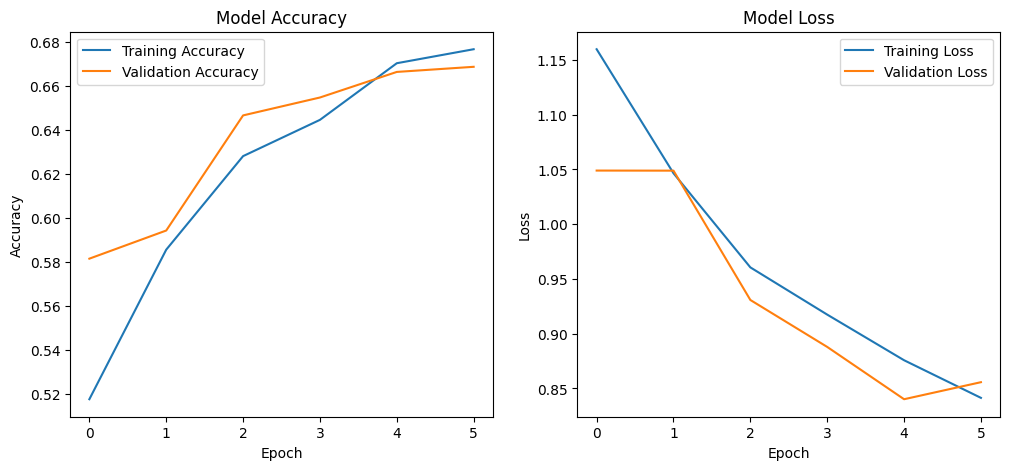

In [ ]:
# ============================================================
# 📊 Visualize Training Performance
# ============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# ============================================================
# 🌼 FUNCTION: MAKE PREDICTIONS ON NEWLY DOWNLOADED IMAGES ONLY
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

def predict_new_image(model, img_path, class_indices, target_size=(128, 128)):
    """
    Predicts the class of a NEW (external) image using a trained CNN model.

    Parameters:
    -----------
    model : keras.Model
        The trained CNN model.
    img_path : str
        File path to the image you downloaded or want to predict.
    class_indices : dict
        Dictionary mapping class names to their index (from train_generator.class_indices).
    target_size : tuple
        Target size to resize the image before prediction (default: (128, 128)).
    """

    # Load and preprocess image
    img = Image.open(img_path).resize(target_size)
    img_array = image.img_to_array(img) / 255.0       # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)     # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = list(class_indices.keys())[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Display the image and results
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    # Print results in text format
    print("🖼️ Image Path:", img_path)
    print("🔍 Predicted Class:", predicted_class)
    print(f"✅ Confidence: {confidence:.2f}%")

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


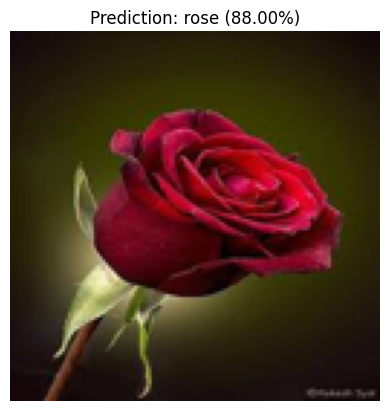

🖼️ Image Path: /content/rose1.jpg
🔍 Predicted Class: rose
✅ Confidence: 88.00%


('rose', np.float32(87.99995))

In [ ]:
# Example: Predict a newly downloaded flower image
img_path = "/content/rose1.jpg"  # replace with your own image path

predict_new_image(model, img_path, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


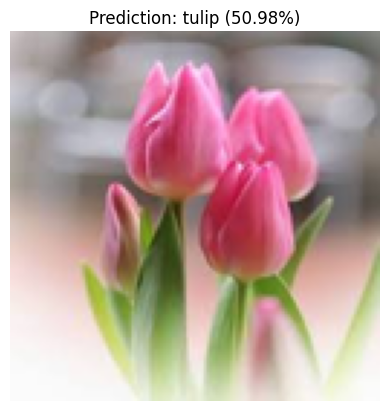

🖼️ Image Path: /content/tulip1.jpg
🔍 Predicted Class: tulip
✅ Confidence: 50.98%


('tulip', np.float32(50.982117))

In [ ]:
# Example: Predict a newly downloaded flower image
img_path = "/content/tulip1.jpg"  # replace with your own image path

predict_new_image(model, img_path, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


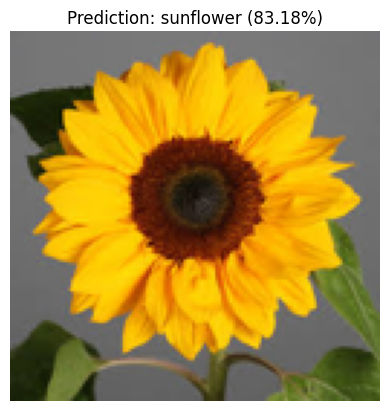

🖼️ Image Path: /content/sunflower1.jpg
🔍 Predicted Class: sunflower
✅ Confidence: 83.18%


('sunflower', np.float32(83.18105))

In [ ]:
# Example: Predict a newly downloaded flower image
img_path = "/content/sunflower1.jpg"  # replace with your own image path

predict_new_image(model, img_path, train_generator.class_indices)